In [5]:
import pandas as pd
import json

# Specify the path
file_path = "station_information.json"

# Read the data
with open(file_path) as file:
    data = json.load(file)

# data is a dictionary with keys ['data', 'last_updated', 'ttl', 'version']
data = data['data']
# data['data'] is a dictionary with the single key ['stations']
data = data['stations']
# data['stations'] is a list of dictionaries, where each dict is a station
fields = data[0].keys()


print(f"There are {len(data)} stations in NYC.")
print(f"Information available for each station:")
print(fields)

There are 2209 stations in NYC.
Information available for each station:
dict_keys(['external_id', 'region_id', 'lon', 'capacity', 'eightd_station_services', 'has_kiosk', 'name', 'electric_bike_surcharge_waiver', 'rental_methods', 'rental_uris', 'short_name', 'station_type', 'lat', 'station_id', 'eightd_has_key_dispenser'])


In [6]:
from helper import Station

stations = []

# The fields that matter for our simulation
interesting_fields = ['station_id', 'name', 'lat', 'lon', 'capacity', 'short_name']

# Extract the fields that are provided
for station_info in data:
    info_array = [station_info[field] for field in interesting_fields]
    stations.append(Station(*info_array))

## Calculate graph
Calculate graph where edges are average duration of a ride from station to station.

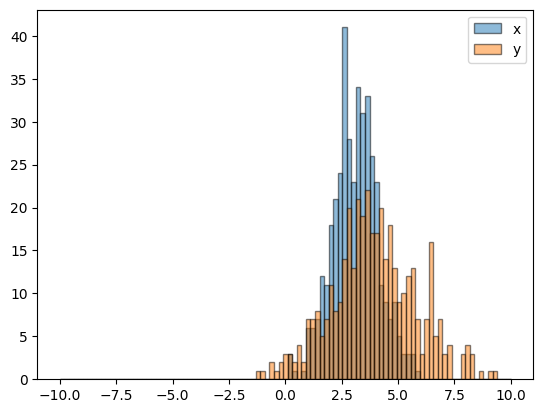

In [7]:

import random
import numpy
from matplotlib import pyplot

x = [random.gauss(3,1) for _ in range(400)]
y = [random.gauss(4,2) for _ in range(400)]

bins = numpy.linspace(-10, 10, 100)

pyplot.hist(x, bins, alpha=0.5, label='x', edgecolor='black')
pyplot.hist(y, bins, alpha=0.5, label='y',edgecolor='black')
pyplot.legend(loc='upper right')
pyplot.show()

In [8]:
import pickle

try:
    with open('station_adjacency.pickle', 'rb') as file:
        adj = pickle.load(file)
except:
    adj = { st.id: [] for st in stations }

    for ix1,station1 in enumerate(stations):
        st1 = station1.id
        for station2 in stations[ix1+1:]:
            st2 = station2.id
            if station1.distance(station2) < 350:
                adj[st1].append(st2)
                adj[st2].append(st1)
    
    with open('station_adjacency.pickle', 'wb') as file:
        pickle.dump(adj, file)

In [9]:
from helper import Dfs

connected_component = (0,-1)
dfs = Dfs(adj) 

for id in adj:
    size_my_component = dfs.run_dfs(id)
    connected_component = max(connected_component, (size_my_component, id))

print(f"The maximum connected component has size {connected_component[0]}")

The maximum connected component has size 1040
